<a href="https://www.kaggle.com/code/hamdankhan212/football-matches-data-exploration-top-leagues?scriptVersionId=216379776" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# FOOTBALL TOP 5 LEAGUES DATA FOR SEASON *2023/24*

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/europe-top-leagues-2023-24-matches-football/bundesliga.csv
/kaggle/input/europe-top-leagues-2023-24-matches-football/laliga.csv
/kaggle/input/europe-top-leagues-2023-24-matches-football/serie_A.csv
/kaggle/input/europe-top-leagues-2023-24-matches-football/ligue_1.csv
/kaggle/input/europe-top-leagues-2023-24-matches-football/premier_league.csv


In [2]:
data = pd.read_csv('/kaggle/input/europe-top-leagues-2023-24-matches-football/premier_league.csv')
data.head()

,date,matchday,home_team,away_team,home_score_full_time,away_score_full_time,home_score_half_time,away_score_half_time,goal_diff,winner,defeat,ref
0,2023-08-11T19:00:00Z,1,Burnley,Man City,0,3,0,2,3,Man City,Burnley,Craig Pawson
1,2023-08-12T12:00:00Z,1,Arsenal,Nottingham,2,1,2,0,1,Arsenal,Nottingham,Michael Oliver
2,2023-08-12T14:00:00Z,1,Bournemouth,West Ham,1,1,0,0,0,DRAW,DRAW,Peter Bankes
3,2023-08-12T14:00:00Z,1,Brighton Hove,Luton Town,4,1,1,0,3,Brighton Hove,Luton Town,David Coote
4,2023-08-12T14:00:00Z,1,Everton,Fulham,0,1,0,0,1,Fulham,Everton,Stuart Attwell


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   date                  380 non-null    object
 1   matchday              380 non-null    int64 
 2   home_team             380 non-null    object
 3   away_team             380 non-null    object
 4   home_score_full_time  380 non-null    int64 
 5   away_score_full_time  380 non-null    int64 
 6   home_score_half_time  380 non-null    int64 
 7   away_score_half_time  380 non-null    int64 
 8   goal_diff             380 non-null    int64 
 9   winner                380 non-null    object
 10  defeat                380 non-null    object
 11  ref                   380 non-null    object
dtypes: int64(6), object(6)
memory usage: 35.8+ KB


In [4]:
data.isna().sum()

date                    0
matchday                0
home_team               0
away_team               0
home_score_full_time    0
away_score_full_time    0
home_score_half_time    0
away_score_half_time    0
goal_diff               0
winner                  0
defeat                  0
ref                     0
dtype: int64

In [5]:
data.describe()

,matchday,home_score_full_time,away_score_full_time,home_score_half_time,away_score_half_time,goal_diff
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,19.500000,1.800000,1.478947,0.734211,0.626316,1.584211
std,10.980313,1.365616,1.277811,0.831687,0.823367,1.355440
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,1.000000,1.000000,0.000000,0.000000,1.000000
50%,19.500000,2.000000,1.000000,1.000000,0.000000,1.000000
75%,29.000000,3.000000,2.000000,1.000000,1.000000,2.000000
max,38.000000,6.000000,8.000000,4.000000,5.000000,8.000000


# Data Analysis

### Most wins

In [6]:
data["winner"].value_counts()

winner
DRAW              82
Man City          28
Arsenal           28
Liverpool         24
Aston Villa       20
Tottenham         20
Newcastle         18
Man United        18
Chelsea           18
West Ham          14
Bournemouth       13
Everton           13
Wolverhampton     13
Fulham            13
Crystal Palace    13
Brighton Hove     12
Brentford         10
Nottingham         9
Luton Town         6
Burnley            5
Sheffield Utd      3
Name: count, dtype: int64

### Most Defeats

In [7]:
data["defeat"].value_counts()

defeat
DRAW              82
Sheffield Utd     28
Burnley           24
Luton Town        24
Nottingham        20
Brentford         19
Wolverhampton     18
Fulham            17
Everton           16
Bournemouth       16
Crystal Palace    15
West Ham          14
Brighton Hove     14
Man United        14
Newcastle         14
Tottenham         12
Chelsea           11
Aston Villa       10
Arsenal            5
Liverpool          4
Man City           3
Name: count, dtype: int64

### Goal Difference

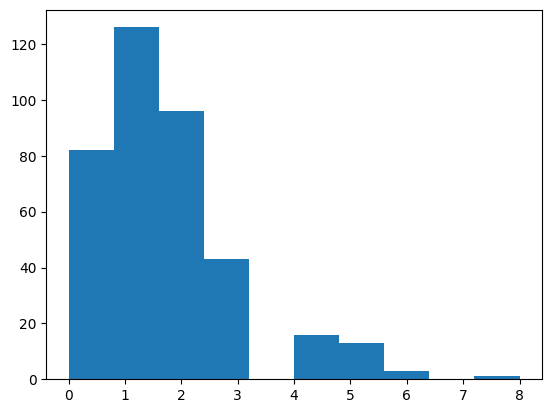

In [8]:
from matplotlib import pyplot as plt

plt.hist(data["goal_diff"])
plt.show()

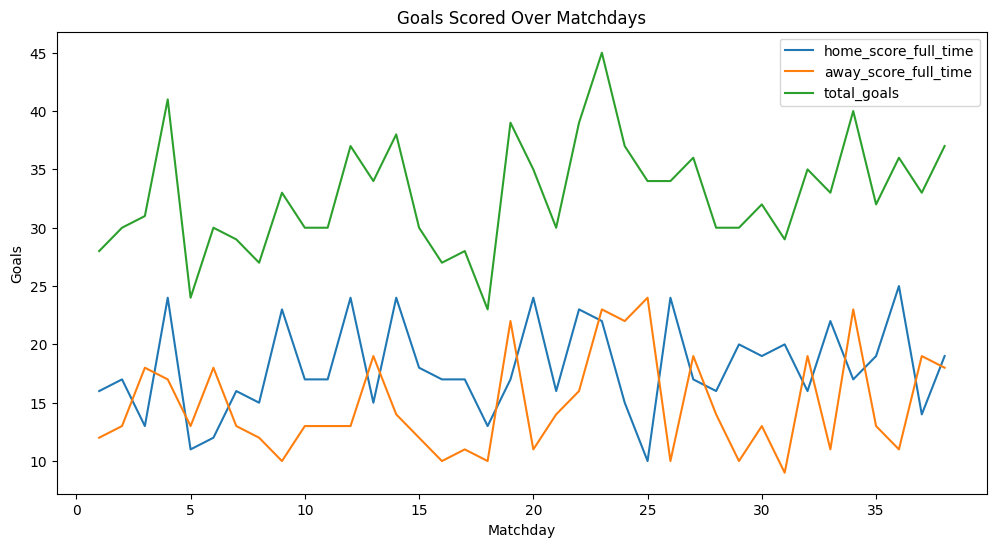

In [9]:
matchday_goals = data.groupby('matchday')[['home_score_full_time', 'away_score_full_time']].sum()
matchday_goals['total_goals'] = matchday_goals['home_score_full_time'] + matchday_goals['away_score_full_time']

matchday_goals.plot(y=['home_score_full_time', 'away_score_full_time', 'total_goals'], figsize=(12, 6))
plt.title('Goals Scored Over Matchdays')
plt.xlabel('Matchday')
plt.ylabel('Goals')
plt.show()

Average goal difference (home - away): 0.32105263157894737


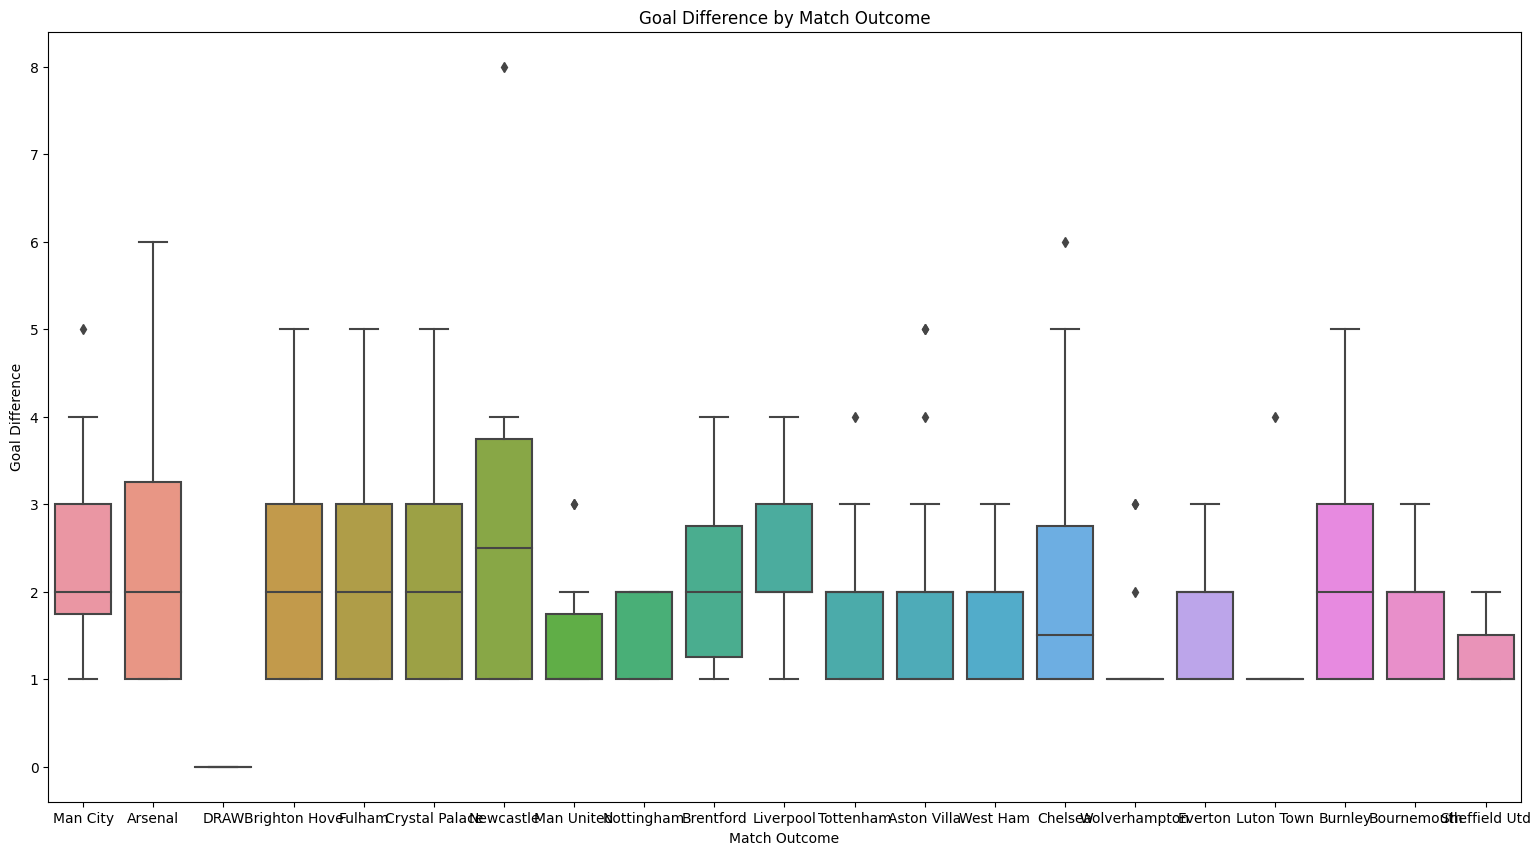

In [10]:
import seaborn as sns

home_advantage = data['home_score_full_time'] - data['away_score_full_time']

print("Average goal difference (home - away):", home_advantage.mean())

plt.figure(figsize=(19,10))
sns.boxplot(x='winner', y='goal_diff', data=data)
plt.title('Goal Difference by Match Outcome')
plt.xlabel('Match Outcome')
plt.ylabel('Goal Difference')
plt.show()